In [ ]:
from google.colab import files

uploaded = files.upload()


Saving World-Stock-Prices-Dataset.csv to World-Stock-Prices-Dataset.csv


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score, mean_squared_error,r2_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor

In [ ]:
filename = list(uploaded.keys())[0]

Top & Worst Performing Stocks by Average Closing Price

<ipython-input-7-8834b148f53d>:3: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'])
<ipython-input-7-8834b148f53d>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.values, y=top_10.index, palette="viridis")


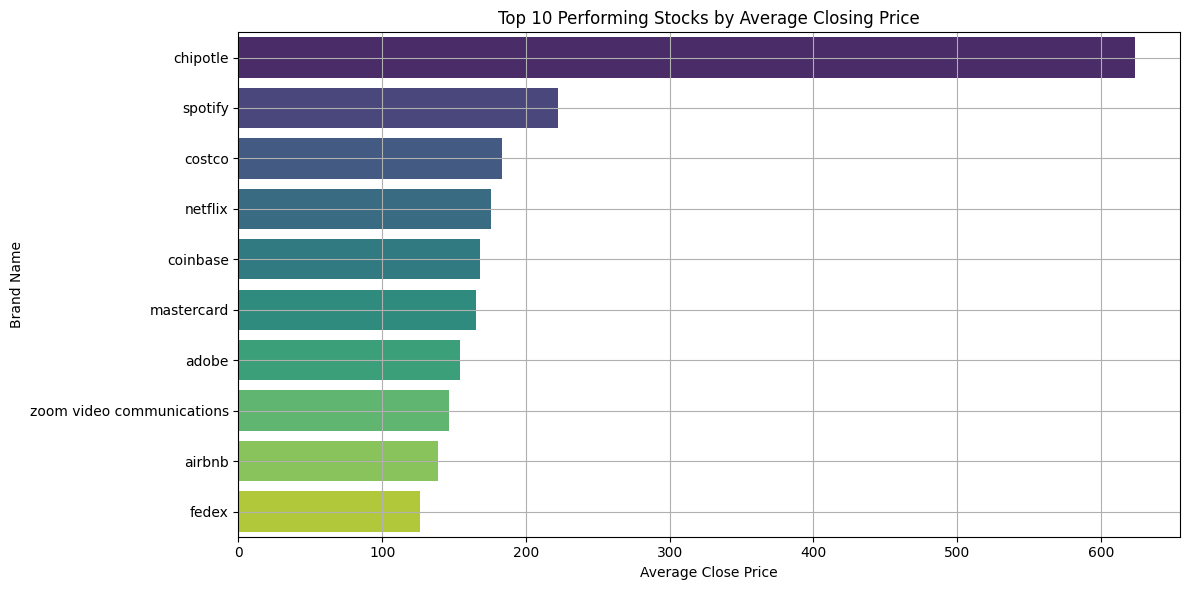

<ipython-input-7-8834b148f53d>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=worst_10.values, y=worst_10.index, palette="rocket")


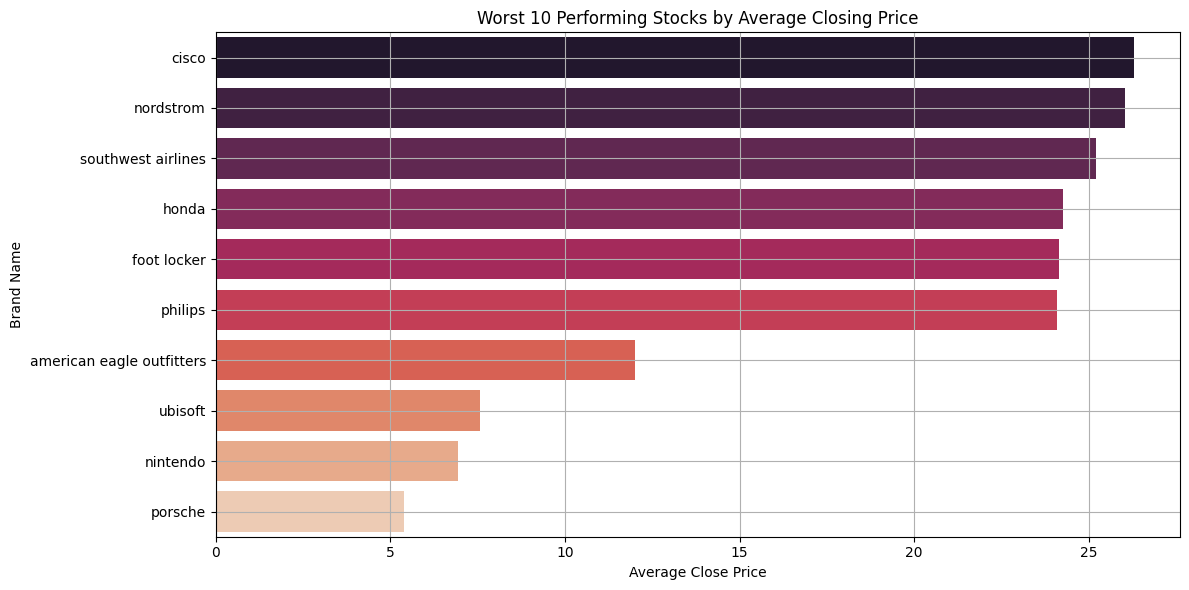

In [ ]:


# Load data
df = pd.read_csv('World-Stock-Prices-Dataset.csv')
df['Date'] = pd.to_datetime(df['Date'])

# Group by brand and calculate average closing price
avg_close = df.groupby('Brand_Name')['Close'].mean().sort_values(ascending=False)

# Top 10 stocks
top_10 = avg_close.head(10)

# Worst 10 stocks
worst_10 = avg_close.tail(10)

# Plot Top 10
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10.values, y=top_10.index, palette="viridis")
plt.title("Top 10 Performing Stocks by Average Closing Price")
plt.xlabel("Average Close Price")
plt.ylabel("Brand Name")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Worst 10
plt.figure(figsize=(12, 6))
sns.barplot(x=worst_10.values, y=worst_10.index, palette="rocket")
plt.title("Worst 10 Performing Stocks by Average Closing Price")
plt.xlabel("Average Close Price")
plt.ylabel("Brand Name")
plt.grid(True)
plt.tight_layout()
plt.show()


 What is the Overall Market Trend Over Time?

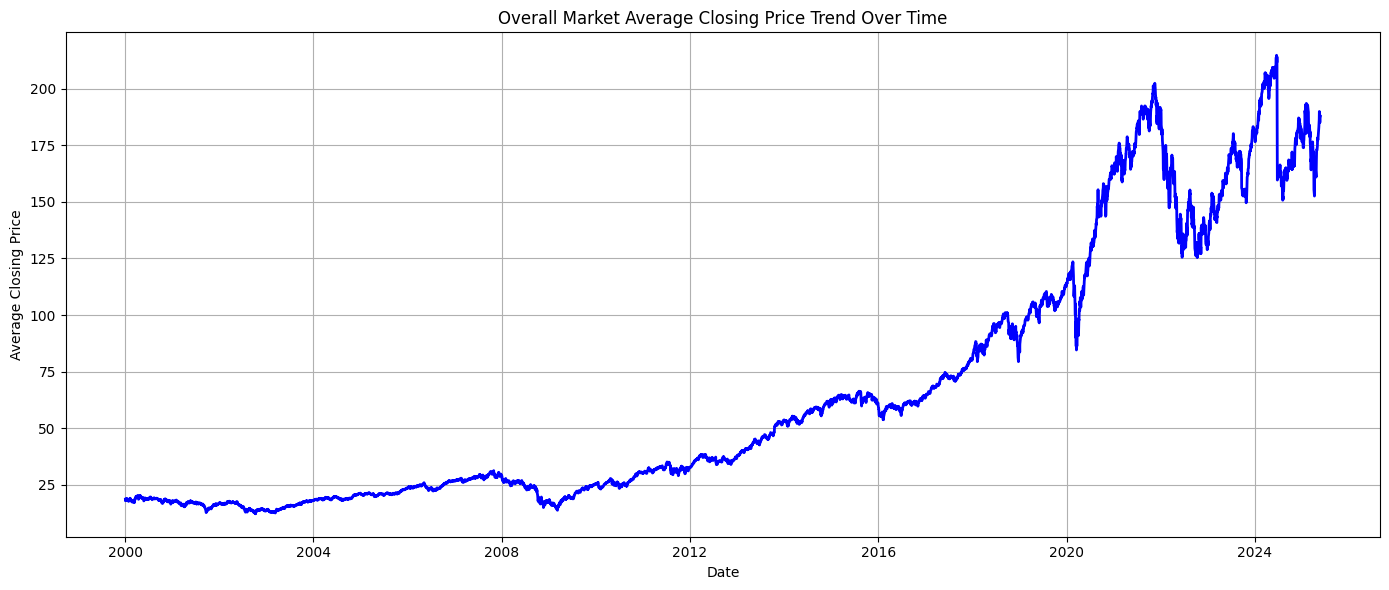

In [ ]:
# Group by date and calculate average closing price
avg_trend = df.groupby('Date')['Close'].mean()

# Plot krega trend
plt.figure(figsize=(14, 6))
plt.plot(avg_trend.index, avg_trend.values, color='blue', linewidth=2)
plt.title("Overall Market Average Closing Price Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Average Closing Price")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#  agr possible hai to Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort krega data by Date
df = df.sort_values(by='Date')

# nikalega rows with missing values
df = df.dropna()

<ipython-input-11-a296fde40d6e>:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Date'] = pd.to_datetime(df['Date'])


Industry-Wise Stock Distribution (Pie Chart)

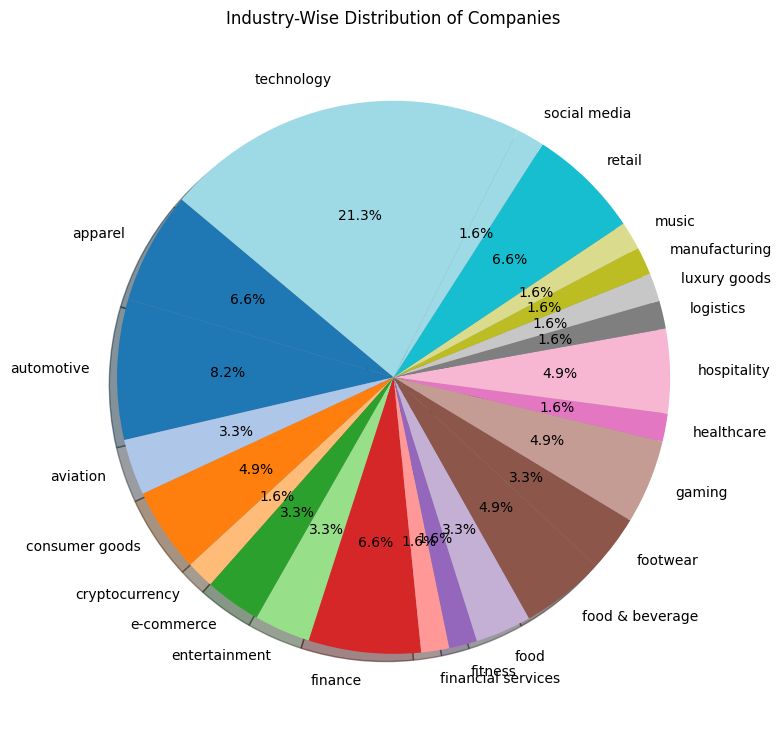

In [ ]:


industry_dist = df[['Brand_Name', 'Industry_Tag']].drop_duplicates().groupby('Industry_Tag').count()
industry_dist = industry_dist.rename(columns={'Brand_Name': 'Stock Count'})

plt.figure(figsize=(8, 8))
industry_dist['Stock Count'].plot.pie(autopct='%1.1f%%', shadow=True, startangle=140, cmap='tab20')
plt.title("Industry-Wise Distribution of Companies")
plt.ylabel("")
plt.tight_layout()
plt.show()

Country-Wise Stock Distribution (Pie Chart)


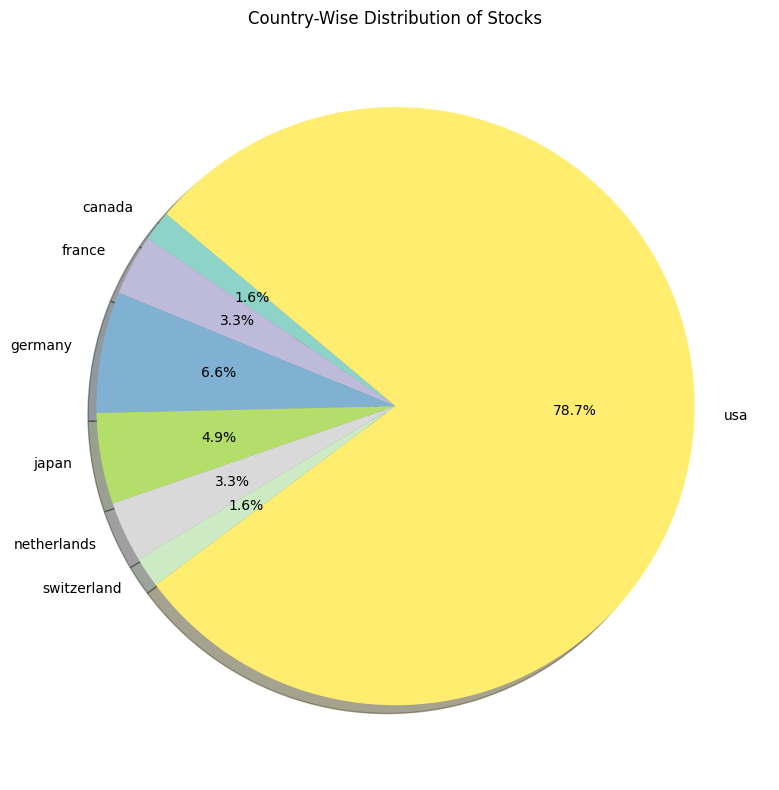

In [ ]:

country_dist = df[['Brand_Name', 'Country']].drop_duplicates().groupby('Country').count()
country_dist = country_dist.rename(columns={'Brand_Name': 'Stock Count'})


plt.figure(figsize=(8, 8))
country_dist['Stock Count'].plot.pie(autopct='%1.1f%%', shadow=True, startangle=140, cmap='Set3')
plt.title("Country-Wise Distribution of Stocks")
plt.ylabel("")
plt.tight_layout()
plt.show()

Stocks with Highest and Lowest Closing Prices Ever Recorded

In [ ]:

max_row = df[df['Close'] == df['Close'].max()]
min_row = df[df['Close'] == df['Close'].min()]

print(" Stock with Highest Closing Price:")
print(max_row[['Brand_Name', 'Date', 'Close']])

print("\n Stock with Lowest Closing Price:")
print(min_row[['Brand_Name', 'Date', 'Close']])

NameError: name 'df' is not defined

 Volume Analysis – Top 10 Stocks with Highest Trading Volume (Avg)

<ipython-input-28-ff93da0232a6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_volume.values, y=avg_volume.index, palette="coolwarm")


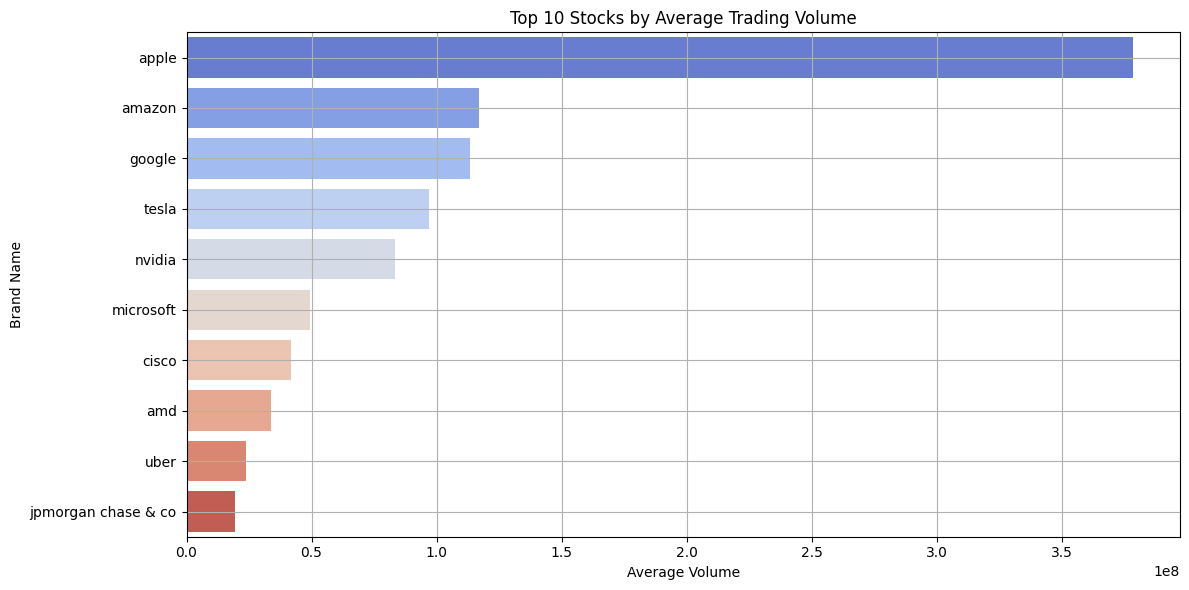

In [ ]:
# Average volume per stock
avg_volume = df.groupby('Brand_Name')['Volume'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_volume.values, y=avg_volume.index, palette="coolwarm")
plt.title("Top 10 Stocks by Average Trading Volume")
plt.xlabel("Average Volume")
plt.ylabel("Brand Name")
plt.grid(True)
plt.tight_layout()
plt.show()


Volatility Check – Stocks with Highest Price Fluctuation

<ipython-input-30-2bf6d063261d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=volatility.values, y=volatility.index, palette="Blues")


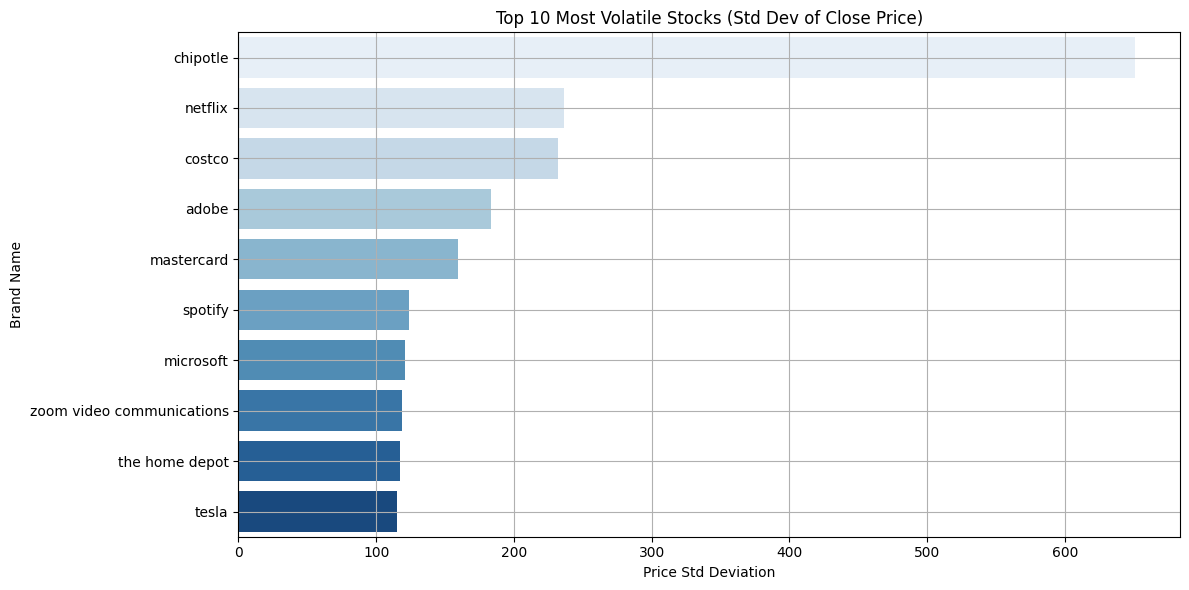

In [ ]:
# Create volatility metric (std deviation of Close)
volatility = df.groupby('Brand_Name')['Close'].std().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=volatility.values, y=volatility.index, palette="Blues")
plt.title("Top 10 Most Volatile Stocks (Std Dev of Close Price)")
plt.xlabel("Price Std Deviation")
plt.ylabel("Brand Name")
plt.grid(True)
plt.tight_layout()
plt.show()